## Pre-Process the data

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('data/BA_reviews.csv')

In [2]:
reviews.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Manchester to Copenhagen vi...
1,1,✅ Trip Verified | I have never seen such disr...
2,2,✅ Trip Verified | Paid for a 14 hour long fli...
3,3,✅ Trip Verified | Very inconsiderate PA annou...
4,4,"✅ Trip Verified | Absolutely terrible, lost m..."


In [3]:
reviews.columns = ['Rating', 'Review']

In [4]:
reviews.head()

,Rating,Review
0,0,✅ Trip Verified | Manchester to Copenhagen vi...
1,1,✅ Trip Verified | I have never seen such disr...
2,2,✅ Trip Verified | Paid for a 14 hour long fli...
3,3,✅ Trip Verified | Very inconsiderate PA annou...
4,4,"✅ Trip Verified | Absolutely terrible, lost m..."


In [5]:
reviews['Review'] = reviews['Review'].apply(lambda x: x.replace("✅ Trip Verified |","")) 

In [6]:
reviews.head()

,Rating,Review
0,0,Manchester to Copenhagen via London on 30th ...
1,1,I have never seen such disrespect to a custo...
2,2,Paid for a 14 hour long flight ticket which ...
3,3,Very inconsiderate PA announcements were mad...
4,4,"Absolutely terrible, lost my luggage on both..."


In [7]:
reviews['Review'] = reviews['Review'].apply(lambda x: x.replace("Not Verified |","")) 

In [8]:
reviews.head()

,Rating,Review
0,0,Manchester to Copenhagen via London on 30th ...
1,1,I have never seen such disrespect to a custo...
2,2,Paid for a 14 hour long flight ticket which ...
3,3,Very inconsiderate PA announcements were mad...
4,4,"Absolutely terrible, lost my luggage on both..."


In [9]:
reviews.Review.unique().shape

(1000,)

1000 Unique Reviews

## Topic Modelling
Proceed on the basis that data is cleaned and pre-processed

Reference:
https://ourcodingclub.github.io/tutorials/topic-modelling-python/

In [ ]:
reviews.head()

In [36]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=0.2, token_pattern = '\w+|\$[\d\.]+|\S+') # transformer to vector form
# max df discards words that are in 90% of reviews - too common
# min df ensures that words in less than 25 reviews will be discarded - no correlation too minor
tf = vectorizer.fit_transform(reviews['Review']).toarray() # applies transformer to our data
tf_feature_names = vectorizer.get_feature_names_out() # provides insight as to what word each column in matrix represent

In [37]:
tf_feature_names
# word frequency : review

array(["'t", ',', 'a', 'after', 'again', 'airline', 'airways', 'all',
       'an', 'are', 'as', 'at', 'ba', 'back', 'be', 'been', 'british',
       'business', 'but', 'by', 'cabin', 'check', 'class', 'crew', 'did',
       'even', 'flight', 'flights', 'food', 'for', 'from', 'get', 'good',
       'had', 'have', 'heathrow', 'hours', 'i', 'if', 'in', 'is', 'it',
       'just', 'london', 'me', 'more', 'my', 'no', 'not', 'of', 'on',
       'one', 'only', 'or', 'other', 'our', 'out', 'seat', 'seats',
       'service', 'so', 'staff', 'that', 'their', 'them', 'then', 'there',
       'they', 'this', 'time', 'up', 'us', 'very', 'was', 'we', 'were',
       'when', 'which', 'with', 'would', 'you'], dtype=object)

Let's now create the model

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=18)
model.fit(tf)

LatentDirichletAllocation(random_state=18)

In [39]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [40]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,",",1473.4,",",654.4,i,1175.3,i,564.7,i,439.5,we,1160.1,you,479.3,was,959.9,class,395.4,was,911.9
1,ba,278.2,in,396.7,",",506.2,ba,489.5,they,423.9,our,603.1,a,276.6,i,766.0,business,353.5,a,674.8
2,a,253.2,was,351.9,my,483.0,a,370.6,my,365.4,flight,374.0,is,205.0,a,569.0,",",303.0,",",473.0
3,on,201.2,no,291.2,was,465.4,of,313.9,me,268.6,us,370.2,are,202.8,of,401.1,is,284.4,on,427.1
4,my,197.4,at,276.6,a,404.0,for,312.0,",",148.7,were,370.1,they,189.8,it,351.9,a,220.2,flight,411.4
5,flight,177.8,check,231.2,flight,360.8,have,293.9,'t,139.6,",",340.6,have,165.8,not,323.5,seat,210.4,very,388.0
6,with,155.8,of,207.4,with,283.2,this,211.0,had,136.0,a,315.8,not,160.2,in,286.4,in,200.3,were,372.0
7,of,148.4,on,181.4,that,256.7,on,198.1,in,120.1,was,306.6,it,138.1,flight,233.4,of,177.1,crew,344.3
8,was,143.7,a,142.4,airways,216.6,that,198.0,them,105.9,had,291.4,in,133.0,on,232.3,seats,174.9,good,343.1
9,for,136.9,for,128.8,british,216.1,is,190.0,it,103.7,for,270.6,that,131.3,that,204.2,are,119.3,in,340.8


This shows that common words in these reviews include BA - abbreviation for British Airways. We can also see that 'no' was a common word, which indicates that reviews often included do, for example a review might be "BA has delayed flights and no good compensation". Typically 'no' inflicts negative connotations, as a result we can expect a large portion of these reviews to have a criticism towards British Airways.

## Sentiment Analysis
Reference:
https://realpython.com/python-nltk-sentiment-analysis/

In [43]:
import nltk
nltk.download(["names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kirisan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading pa

True

For Sentiment Analysis we will use the NLTK's pretrained SentimentAnalyzer also known as VADER. Valence Aware Dictionary and sEntiment Reasoner.

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Hey, you amazing piece of rubbish")

{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}

In [70]:
def is_positive(review):
    compound_score = sia.polarity_scores(review)['compound']
    if compound_score > 0.5:
        return "strongly"
    elif compound_score > 0.25:
        return "slightly"
    elif compound_score > 0:
        return "barely"
    else:
        return "not"

def is_negative(review):
    compound_score = sia.polarity_scores(review)['compound']
    if compound_score < -0.5:
        return "strongly"
    elif compound_score < -0.25:
        return "slightly"
    elif compound_score < 0:
        return "barely"
    else:
        return "not"
# These are functions to make the logic easier, and is tested below

In [71]:
for review in reviews['Review'][:10]:
    print(f"{review} is {is_positive(review)} positive.\n")
    # here we test to see the positive reviews in 10 reviews, and its depth of positiveness.

  Manchester to Copenhagen via London on 30th April 2024 Aircrafts were A319 and A320, respectively, both in decent condition. I arrived from Africa, and had to transit and change terminal to T3, which is very cumbersome and tedious. Check-in was quick, easy, and professional, got my desired seats due to silver status at BA. From T3 I had to go through one of the worst security checks ever encountered, fragmenting almost every item in my carry-ons. Their Escape Lounge in T3 is quite decent, particular beer choices and prosecco sparkling wine. Food was very poor, neither any savoury snacks nor meaty food at all. Good tarmac view. First flight was delayed, forcing me to catch the 2nd in LHR within ½ hour. However, I was informed clearly at gate upon arriving in LHR, assisting me on next gate and the airline managed to transfer the luggage in this extremely narrow timeslot. Onboard, only a mini-bottle of water and some bagged crumbs were given, fairly useless and superfluous. No IFE or Wi

In [75]:
# lets create a pie chart with % of positive and negative reviews with its detailed strengths.
rating_and_no_of_reviews = {"Strongly Positive":0, "Slightly Positive":0, "Barely Positive":0, "Strongly Negative":0, "Slightly Negative":0, "Barely Negative":0}
for review in reviews['Review']:
    if is_positive(review) == "strongly":
        rating_and_no_of_reviews["Strongly Positive"] = (rating_and_no_of_reviews["Strongly Positive"])+1
    elif is_positive(review) == "slightly":
        rating_and_no_of_reviews["Slightly Positive"] = (rating_and_no_of_reviews["Slightly Positive"])+1
    elif is_positive(review) == "barely":
        rating_and_no_of_reviews["Barely Positive"] = (rating_and_no_of_reviews["Barely Positive"])+1
    elif is_positive(review) == "not":
        if is_negative(review) == "strongly":
            rating_and_no_of_reviews["Strongly Negative"] = (rating_and_no_of_reviews["Strongly Negative"])+1
        elif is_negative(review) == "slightly":
            rating_and_no_of_reviews["Slightly Negative"] = (rating_and_no_of_reviews["Slightly Negative"])+1
        elif is_negative(review) == "barely":
            rating_and_no_of_reviews["Barely Negative"] = (rating_and_no_of_reviews["Barely Negative"])+1

In [76]:
print(rating_and_no_of_reviews)

{'Strongly Positive': 405, 'Slightly Positive': 51, 'Barely Positive': 25, 'Strongly Negative': 416, 'Slightly Negative': 54, 'Barely Negative': 44}


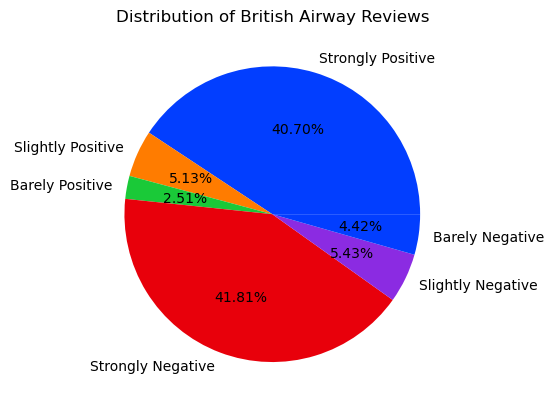

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
review_summary = {"labels" : rating_and_no_of_reviews.keys() ,"values" : rating_and_no_of_reviews.values()}
colors = sns.color_palette('bright')[0:5]
plt.pie(review_summary['values'], labels=review_summary['labels'], colors = colors, autopct='%1.2f%%')
plt.title('Distribution of British Airway Reviews')
plt.show()

## Word Cloud
Reference:
https://www.projectpro.io/recipes/create-word-cloud-python

In [139]:
import wordcloud
import pillow
import numpy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pillow'

In [123]:
from wordcloud import WordCloud, STOPWORDS
all_reviews_combined = ""
for review in reviews['Review']:
    all_reviews_combined += "".join(review)

In [124]:
all_reviews_combined

'  Manchester to Copenhagen via London on 30th April 2024 Aircrafts were A319 and A320, respectively, both in decent condition. I arrived from Africa, and had to transit and change terminal to T3, which is very cumbersome and tedious. Check-in was quick, easy, and professional, got my desired seats due to silver status at BA. From T3 I had to go through one of the worst security checks ever encountered, fragmenting almost every item in my carry-ons. Their Escape Lounge in T3 is quite decent, particular beer choices and prosecco sparkling wine. Food was very poor, neither any savoury snacks nor meaty food at all. Good tarmac view. First flight was delayed, forcing me to catch the 2nd in LHR within ½ hour. However, I was informed clearly at gate upon arriving in LHR, assisting me on next gate and the airline managed to transfer the luggage in this extremely narrow timeslot. Onboard, only a mini-bottle of water and some bagged crumbs were given, fairly useless and superfluous. No IFE or W

In [136]:
from PIL import Image
import numpy as np
mask = np.array(Image.open("airplane_shape.png"))

In [137]:
word_cloud = WordCloud(
        random_state=18,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        mask=mask
).generate(all_reviews_combined)

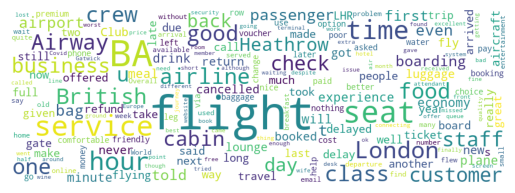

In [138]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()